<a href="https://colab.research.google.com/github/nahin333/DL-practice-codes/blob/main/Handling_imbalanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/nahin333/DL-practice-codes/main/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4238,5016-LIPDW,Male,0,Yes,Yes,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,1061.6,No
5289,3642-GKTCT,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,115.10,6993.65,No
4390,0377-JBKKT,Male,0,Yes,Yes,22,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,57.95,1271.8,No
3965,3692-JHONH,Female,1,Yes,No,52,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.50,5621.85,No
5383,2362-IBOOY,Male,0,No,No,36,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,Yes


In [63]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [64]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [65]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [66]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [67]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [68]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

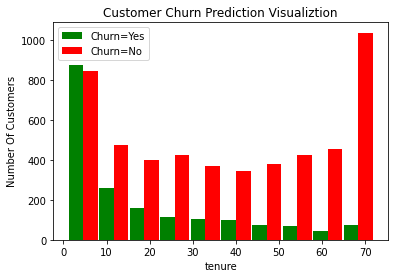

In [69]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

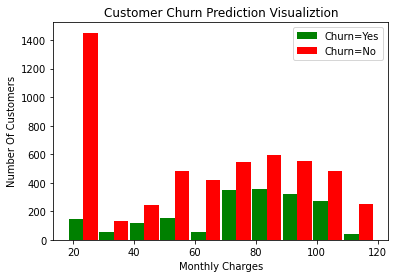

In [70]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [71]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [72]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [73]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [74]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [75]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [76]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [77]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [78]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [79]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [80]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [81]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [82]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [83]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [84]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [85]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [86]:
print(X_train.shape,X_test.shape)

(5625, 26) (1407, 26)


In [87]:
pip install tensorflow-addons==0.15.0

In [88]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow_addons import losses

In [89]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [90]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4946 - accuracy: 0.7493
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.7852
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.7934
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.7945
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8023
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8023
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8025
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8050
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8105
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4058 - accura

###Method 1: Undersampling

In [91]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [92]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis =0)

print('Random under-samploing')
print(df_test_under.Churn.value_counts())

Random under-samploing
1    1869
0    1869
Name: Churn, dtype: int64


In [93]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [95]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [96]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6369 - accuracy: 0.6502
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.7548
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4978 - accuracy: 0.7569
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7619
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7642
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7635
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.7722
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.7682
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4773 - accuracy: 0.7709
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.7719
Epoch 11/

###Method 2: Oversampling

In [97]:
count_class_0, count_class_1

(5163, 1869)

In [98]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis= 0)

print("Random over-sampling")
print(df_test_over.Churn.value_counts())

Random over-sampling
1    5163
0    5163
Name: Churn, dtype: int64


In [99]:
X = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [101]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5435 - accuracy: 0.7271
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7656
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7677
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.7692
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7724
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.7709
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7755
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7749
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.7793
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4604 - accura

###Method 3: SMOTE (Synthetic Minority Oversampling Technique)

In [102]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [103]:
!pip install imbalanced-learn

In [104]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [105]:
y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [107]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [108]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [109]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5521 - accuracy: 0.7285
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.7712
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.7736
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.7785
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.7791
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4540 - accuracy: 0.7851
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.7866
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.7881
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.7944
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4362 - accura

###Method 4: Use of Ensemble with undersampling

In [110]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [111]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [113]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [114]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [115]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [120]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

  X_train = df_train.drop('Churn', axis = 'columns')
  y_train = df_train.Churn

  return X_train, y_train

In [126]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6174 - accuracy: 0.6759
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5225 - accuracy: 0.7525
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7605
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4890 - accuracy: 0.7692
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.7719
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.7709
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7726
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7763
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.7732
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.7753
Epoch 11/

In [127]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2290)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
72/72 [==============================] - 1s 1ms/step - loss: 0.6188 - accuracy: 0.6467
Epoch 2/100
72/72 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7856
Epoch 3/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7943
Epoch 4/100
72/72 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.7974
Epoch 5/100
72/72 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.7996
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.7987
Epoch 7/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7974
Epoch 8/100
72/72 [==============================] - 0s 1ms/step - loss: 0.4454 - accuracy: 0.7961
Epoch 9/100
72/72 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.8061
Epoch 10/100
72/72 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.8004
Epoch 11/

In [128]:
X_train, y_train = get_train_batch(df3_class0, df3_class1,2990, 4130)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6257 - accuracy: 0.6668
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7624
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.7666
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.7712
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7727
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.7712
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.7731
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7753
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.7772
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4655 - accuracy: 0.7761
Epoch 11/

In [139]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
  if n_ones > 1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

In [140]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1033
           1       0.45      0.82      0.58       374

    accuracy                           0.69      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.79      0.69      0.71      1407

